In [2]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import sys
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
np.random.seed(1234)

# Time Series

# Exercises

In [22]:
# 1) Generate 1000 samples from a regular ARMA(2,2) model of your choice. Now try changing the model so that
#    it is not invertible, and then so that it is not causal. Do you notice any differences in behaviour?
# 2) Generate 1000 samples from an ARIMA(2,1,1) model of your choice.
# 3) The following three data sets each comprise 100 samples from a time series. Apply diagnostics to classify
#    each one.

xta=np.array([-0.8082435,   0.28790656,  0.99824984, -0.88043877, -1.88190118,  0.67417886,
 -0.75819545, -1.4399763,  0.56887248,  0.45234337, -0.65833495, -0.89278295,
  1.17216424,  0.83449916, -0.47968117, -1.31879571,  1.43870222,  4.12902529,
  3.4440528,   0.66401346, -0.79785233,  0.45404208, -0.0938888,   0.82829275,
 -0.53491318, -1.5626577,  -0.02207305, -0.50874452, -0.53382051, -0.98356459,
 -0.72217874, -2.78619334, -3.56718054, -1.88190566,  1.56224623,  2.20530469,
  0.82974193,  0.02883344, -1.35431475, -0.81712454, -0.6464773,  -1.75457661,
 -1.4066747,   0.50121207,  1.58356353,  0.95429309,  2.20566162,  1.6048656,
  0.93923152,  2.02660919, -0.23633688, -2.44382323, -0.06954423,  0.61259582,
  0.56148642,  1.15094762,  1.47457263,  2.24397572,  2.40608113, 1.64787215,
 -0.89805968, -0.91230836,  0.12326111, -0.68027155,  0.79912514,  1.85469958,
  1.04977466, -0.50609208, -2.2330396,  -1.28325236,  0.78166099,  0.56412523,
  1.14450764, -0.52007207, -3.22586259, -1.22891974,  0.54901573,  1.05053484,
 -0.32649829, -2.49748229, -0.54684949,  0.3721408,  2.28677482,  2.41344356,
  0.24393181, -2.33882309, -2.74987955, -2.00913291,  2.12973476,  3.07370878,
  2.33133172, -1.24651195, -2.21497346,  0.15379034,  1.11700559, 1.83244472,
 -0.28881549, -2.69399077, -1.60250271, -0.04478414])

xtb=np.array([ 1.47394369,  3.33443632,  3.74194871,  3.42523403,  2.52141627, 1.24817288,
 -2.02011679, -3.07927135, -4.23914173, -3.33035994, -3.40447946,  0.15988935,
  2.68282338,  4.16290882,  4.39844062,  5.63332436,  3.86149247,  2.13346058,
  0.42307727, -0.47770223, -0.13006222,  0.1039679,  -0.37834576, -0.03157879,
  0.55046271,  0.84987597, -0.70026432, -0.70516986,  0.45552681, -0.88440218,
 -0.51892254, -0.40681695,  0.66428455, -0.20142571,  1.44559807, -1.02121548,
 -0.09022577, -0.90299062,  0.40846931, -0.633996,    0.30629942, -0.18185054,
  0.69882366,  0.87778147,  1.19572499,  1.46072671,  0.53521897,  0.46812818,
 -1.65315258, -2.30064696, -1.30904121, -0.47036392, -1.30937719, -0.46755344,
 -0.95245067, -0.0296061,  -0.55602044,  0.22538285, -0.34239971,  0.93205598,
 -1.50764398, -1.27961781, -0.69769503, -1.05618941, -1.2113792,   1.39361416,
  1.69761225,  0.03909226,  1.58395984,  2.6926283,   2.01377105,  1.86455692,
  2.73279572,  3.13972357,  2.10399728,  2.30367313,  2.18770359,  2.82600858,
  1.55226282,  1.48588095, -0.12814041, -1.06012911, -0.37582607, -1.19770502,
 -0.47444296, -0.31753512, -0.22956124, -0.07098526,  2.21587,    -0.35777095,
 -0.15528994,  1.21191386,  0.69546354,  1.46004409,  4.98315994,  4.87032578,
  3.13724711,  2.25546505, -1.29404692, -1.54451294])

xtc=np.array([-1.10811140e+00, -7.25718634e-01,  5.22804335e-01,  1.23444190e+00,
  9.68958507e-02, -9.87922064e-01,  6.72327725e-02, -5.92591786e-01,
 -9.31771173e-01,  1.05536277e+00,  8.05172548e-01,  1.33568453e+00,
 -4.25127879e-01, -3.18535750e-01, -8.64370408e-01, -1.75326594e+00,
  2.63866838e-01, -1.04792843e+00,  1.26671277e+00, -1.71006687e+00,
  5.01182766e-01,  4.14974911e-01,  8.87334048e-01,  1.03076464e-03,
  1.18499261e+00, -2.26201584e-02, -5.16342982e-01,  5.81454230e-01,
 -3.32488787e-01, -2.78954704e-01,  6.16956430e-01,  6.89622034e-01,
  6.77255376e-01, -7.47866705e-01,  6.19950922e-01,  4.11113446e-01,
  2.07251193e+00, -6.34185021e-01,  9.20522540e-01, -1.71062624e+00,
  6.24102813e-01, -1.74331905e+00,  7.13069925e-01, -6.59260673e-01,
 -2.11960325e+00,  1.13857765e+00, -7.63090920e-02,  1.81151350e+00,
  1.49307210e+00,  3.29188454e-01,  1.47505209e-01,  1.49003034e+00,
  6.55154912e-01, -1.03623236e+00,  2.07913349e-01,  8.45314492e-01,
 -6.93527389e-02, -2.92632953e-01,  1.02327665e+00,  5.55719181e-02,
 -3.95939456e-02, -1.34582713e+00,  3.36008583e-02,  4.78063668e-01,
  7.91582357e-01, -5.48236299e-01, -1.92312897e-01, -9.12549372e-01,
 -1.72582326e+00,  1.14740933e+00,  8.95775039e-02,  8.39743114e-02,
  1.83580334e-01,  6.72342655e-01, -2.91323746e+00,  6.58143437e-01,
 -1.07404727e+00,  5.53477555e-01, -1.08142100e-01,  1.71363004e-01,
  7.36943229e-03,  1.56316551e+00, -1.41279948e+00,  1.05070220e+00,
 -1.15698461e+00,  1.16666952e+00, -4.97479729e-01,  1.79011849e-01,
 -1.15848429e+00, -1.05250993e+00,  3.94313197e-01,  1.50511646e+00,
  6.25720885e-01, -1.03197578e-01, -3.57159255e-01,  1.76541949e-01,
 -3.14751770e-01,  4.16481963e-01,  4.07936179e-01, -1.83279107e+00])

# Solutions

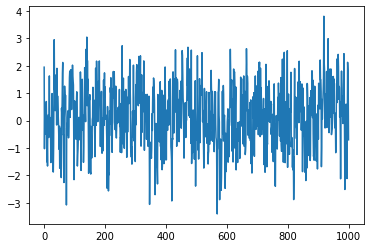

In [26]:
# 1) Written in the form P(B) X_t = T(B) w_t, a regular ARMA process is one for which the roots of P(B) and
#    T(B) all lie outside the unit circle, and there are no roots in common. You can choose any process that
#    satisfies these constraints, but we take the roots of P(B) to be 2 and 3, and the roots of T(B) to be 4
#    and 5. P(B) = (1-B/2)*(1-B/3) = 1 - 5B/6 + B^2/6, T(B) = (1-B/4)(1-B/5) = 1 - 9B/20 + B^2/20. We generate
#    this process as follows.

length=1000
c=0
p=2
d=0
q=2
sig=1.

# Coefficients of AR terms
alpha=np.array([5./6.,-1./6.0])

# Coefficients of MA terms
theta=np.array([-0.45,0.05])

# Array for underlying ARMA(p,q) process, Yt, and target process, Xt
yt=np.empty(length+p)
xt=np.empty(length)

# Array of initial values for target process
xtinit=np.empty(d)

# Generate underlying white noise process
wt=np.random.normal(0.,sig,length+q)

# Initial values for the ARMA(p,q) process
for i in range(p):
    yt[i]=np.random.uniform(-1.,1.,1)

# Generate ARMA(p,q) process
for i in range(p,length+p):
    yt[i]=c+wt[i-p+q]
    for j in range(p):
        yt[i]+=alpha[j]*yt[i-1-j]
    for j in range(q):
        yt[i]+=theta[j]*wt[i-p+q-1-j]
        
# Initialise target process for integration
for i in range(length):
    xt[i]=yt[i+p]
    
for i in range(d):
    xtinit[i]=np.random.uniform(-1.,1.,1)
    xt[0]=xtinit[i]
    for j in range(1,length):
        xt[j]=xt[j-1]+xt[j]
        
plt.plot(xt)

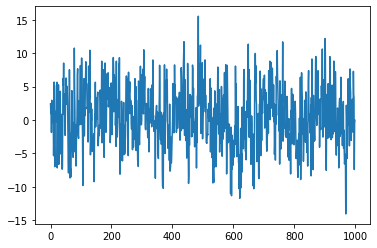

In [27]:
# We now change the roots of T(B) so that the process is not invertible, by moving the root from 4 to 1/4.
# T(B) = (1-4B)(1-B/5) = 1 - 21 B/5 + 4 B^2/5. The resulting process looks similar, but has larger departures
# from zero.

length=1000
c=0
p=2
d=0
q=2
sig=1.

# Coefficients of AR terms
alpha=np.array([5./6.,-1./6.0])

# Coefficients of MA terms
theta=np.array([-4.2,0.8])

# Array for underlying ARMA(p,q) process, Yt, and target process, Xt
yt=np.empty(length+p)
xt=np.empty(length)

# Array of initial values for target process
xtinit=np.empty(d)

# Generate underlying white noise process
wt=np.random.normal(0.,sig,length+q)

# Initial values for the ARMA(p,q) process
for i in range(p):
    yt[i]=np.random.uniform(-1.,1.,1)

# Generate ARMA(p,q) process
for i in range(p,length+p):
    yt[i]=c+wt[i-p+q]
    for j in range(p):
        yt[i]+=alpha[j]*yt[i-1-j]
    for j in range(q):
        yt[i]+=theta[j]*wt[i-p+q-1-j]
        
# Initialise target process for integration
for i in range(length):
    xt[i]=yt[i+p]
    
for i in range(d):
    xtinit[i]=np.random.uniform(-1.,1.,1)
    xt[0]=xtinit[i]
    for j in range(1,length):
        xt[j]=xt[j-1]+xt[j]
        
plt.plot(xt)

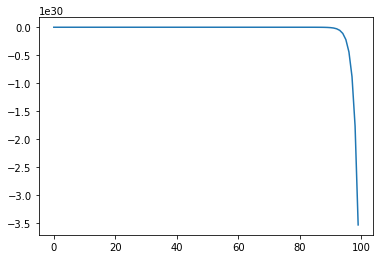

In [28]:
# Finally we change the roots of P(B) so that the process is not causal, by moving the root from 2 to 1/2.
# P(B) = (1-2B)(1-B/3) = 1 - 7 B/3 + 2 B^2/3. The resulting process rapidly moves away from zero and looks
# very different. If it is not causal an AR process is not stationary.

length=100
c=0
p=2
d=0
q=2
sig=1.

# Coefficients of AR terms
alpha=np.array([7./3.,-2./3.0])

# Coefficients of MA terms
theta=np.array([-4.2,0.8])

# Array for underlying ARMA(p,q) process, Yt, and target process, Xt
yt=np.empty(length+p)
xt=np.empty(length)

# Array of initial values for target process
xtinit=np.empty(d)

# Generate underlying white noise process
wt=np.random.normal(0.,sig,length+q)

# Initial values for the ARMA(p,q) process
for i in range(p):
    yt[i]=np.random.uniform(-1.,1.,1)

# Generate ARMA(p,q) process
for i in range(p,length+p):
    yt[i]=c+wt[i-p+q]
    for j in range(p):
        yt[i]+=alpha[j]*yt[i-1-j]
    for j in range(q):
        yt[i]+=theta[j]*wt[i-p+q-1-j]
        
# Initialise target process for integration
for i in range(length):
    xt[i]=yt[i+p]
    
for i in range(d):
    xtinit[i]=np.random.uniform(-1.,1.,1)
    xt[0]=xtinit[i]
    for j in range(1,length):
        xt[j]=xt[j-1]+xt[j]
        
plt.plot(xt)

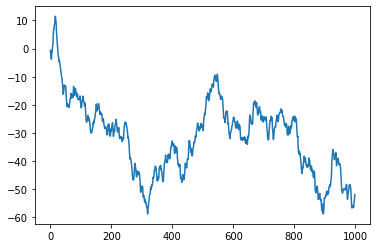

In [29]:
# 2) We generate samples from an ARIMA(2,1,1) process as follows

length=1000
c=0
p=2
d=1
q=1
sig=1.

# Coefficients of AR terms
alpha=np.array([5./6.,-1./6.0])

# Coefficients of MA terms
theta=np.array([-0.45])

# Array for underlying ARMA(p,q) process, Yt, and target process, Xt
yt=np.empty(length+p)
xt=np.empty(length)

# Array of initial values for target process
xtinit=np.empty(d)

# Generate underlying white noise process
wt=np.random.normal(0.,sig,length+q)

# Initial values for the ARMA(p,q) process
for i in range(p):
    yt[i]=np.random.uniform(-1.,1.,1)

# Generate ARMA(p,q) process
for i in range(p,length+p):
    yt[i]=c+wt[i-p+q]
    for j in range(p):
        yt[i]+=alpha[j]*yt[i-1-j]
    for j in range(q):
        yt[i]+=theta[j]*wt[i-p+q-1-j]
        
# Initialise target process for integration
for i in range(length):
    xt[i]=yt[i+p]
    
for i in range(d):
    xtinit[i]=np.random.uniform(-1.,1.,1)
    xt[0]=xtinit[i]
    for j in range(1,length):
        xt[j]=xt[j-1]+xt[j]
        
plt.plot(xt)

0.024661319800000005


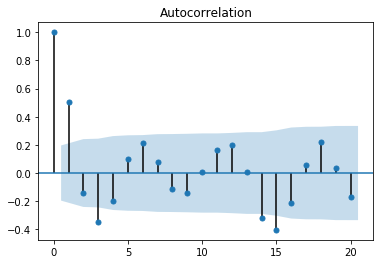

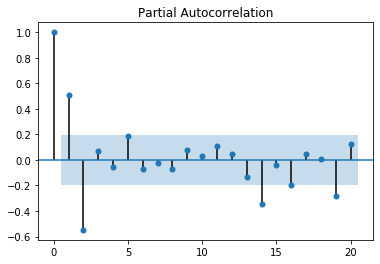

In [30]:
# 3) For each of the data sets we plot the acf and pacf.

# a) The acf has significant departures from zero even at relatively high lags, but the PACF seems to
#    be different from zero only at lags of 1 and 2. Guess it is an AR(2) process (which is was).

print(np.mean(xta))
plot_acf(xta)
plot_pacf(xta)
plt.show()

0.5513824425999999


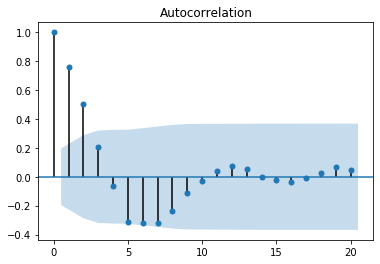

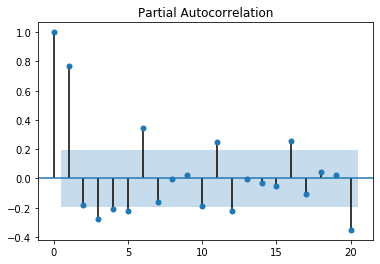

In [31]:
# b) Looks like a moving average process, since ACF goes to ze4ro but PACF does not. Might guess MA(2) or MA(3)
#    but in fact MA(4).

print(np.mean(xtb))
plot_acf(xtb)
plot_pacf(xtb)
plt.show()

0.0166637929793


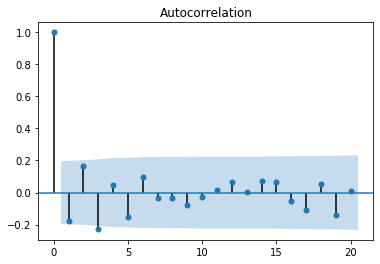

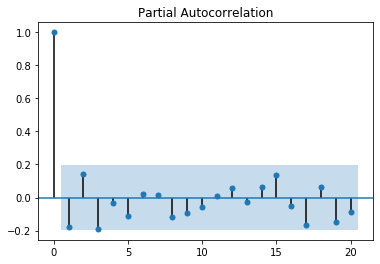

In [32]:
# c) Guess white noise, as no sign of non-zero coefficients in either ACF or PACF.

print(np.mean(xtc))
plot_acf(xtc)
plot_pacf(xtc)
plt.show()

# Nonparametric Regression

# Exercise

In [33]:
# The following is an array of 128 observed data values, evenly spaced on the interval [0,1].
# Use the three different methods above to obtain nonparametric fits to this data.

y=np.array([ 5.04144455e-02, -2.01369478e-01,  8.69375208e-04, -9.95240360e-02,
 -1.56809115e-01,  1.34803585e-02, -1.02999516e-01,  5.87158003e-01,
  6.70561994e-01, -1.29036855e-01,  7.20358265e-01,  1.25312586e+00,
  1.45416349e-01,  4.09718890e-01, -4.40007672e-01, -4.16883695e-01,
  3.14649063e-01, -3.57737394e-01,  3.20557849e-01,  3.08935728e-01,
  8.26343435e-01,  8.25412574e-01,  6.67756026e-01,  2.02450441e-01,
  5.55824161e-01,  4.00741582e-01, -1.72740728e-01,  1.53062259e-01,
 -5.02972616e-02, -1.46991921e-01, -6.12715910e-01,  6.57642478e-01,
 -2.31359683e-02,  2.71041661e-01, -4.02896405e-01, -1.26187797e-01,
  1.63544026e-01, -3.49214292e-01, -7.84941829e-01, -3.76170153e-01,
 -9.26448759e-01, -8.63655680e-01, -8.21792517e-01, -9.02045390e-01,
 -4.49324439e-01, -9.06606136e-01, -1.03232046e+00, -8.69787631e-01,
 -1.95885263e-01, -1.06854267e+00, -1.22059180e+00, -1.27128968e+00,
 -1.58833206e+00, -4.68725734e-01, -8.43294045e-01, -1.42371193e+00,
 -5.68878534e-01, -4.64703131e-01, -1.49789687e-01, -4.51638540e-01,
 -3.02200723e-01, -3.71600734e-01,  3.84455488e-01,  2.09816650e-01,
  4.77266452e-01,  1.24655924e+00,  3.28967492e-01, -4.31417570e-02,
  4.56053572e-01,  7.72113458e-01,  7.91991695e-01,  1.31893341e+00,
  1.13007598e+00,  1.17273910e+00,  1.08348807e+00,  4.44456294e-01,
  4.71037241e-01,  1.28712654e+00,  1.29003755e+00,  4.46447999e-01,
  7.07725843e-01,  1.04370759e+00,  9.91769118e-01,  3.38322085e-01,
  8.85394030e-01,  4.99472426e-01,  2.90480669e-01,  4.61258517e-01,
  3.78847859e-01,  8.58013172e-01, -1.26014141e-01,  9.94982715e-01,
  3.21585852e-01,  2.69065530e-01,  3.88877305e-01, -2.81486342e-01,
 -1.00181598e+00, -1.00361269e-01, -2.12247065e-01, -3.98870500e-01,
 -4.10074624e-01, -4.55355505e-01,  9.06905016e-01, -5.51174731e-01,
  2.41580163e-01, -3.77969124e-01, -5.65215378e-01, -1.54538906e-02,
  5.62699003e-02, -8.10726429e-01, -1.55455208e-01, -1.02754878e+00,
 -3.39611929e-01, -6.34196663e-01,  2.12063187e-01, -5.18937633e-01,
 -1.00617921e+00,  4.39494672e-01,  7.40647975e-02, -5.88518868e-02,
  5.57919022e-02, -2.24838640e-01, -4.60744632e-01,  1.22475171e-01,
 -3.46199327e-01,  5.00237174e-01,  3.70164102e-01,  2.09410026e-01])

[0.02227646]


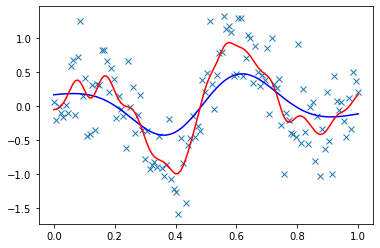

In [34]:
x = np.linspace(0.0, 1.0, 128)

# Fit data using a Nadaraya-Watson estimator
from statsmodels.nonparametric import kernel_regression as kernel

# Fit Nadaraya-Watson estimator with specified bandwidth
NWest=kernel.KernelReg(y,x,'c',reg_type='lc',bw=[-0.1])

# Fit Nadaraya-Watson estimator with cross-validation bandwidth
NWestCV=kernel.KernelReg(y,x,'c',reg_type='lc',bw='cv_ls')

# Output cross-validated bandwidth
print(NWestCV.bw)

# Plot results
yfit=NWest.fit(x)[0]
yfitCV=NWestCV.fit(x)[0]
plt.plot(x,y,'x')
plt.plot(x,yfit,'b')
plt.plot(x,yfitCV,'r')

0.999999945756675


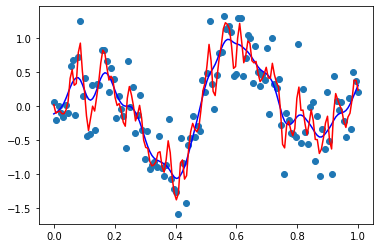

In [35]:
# Fit data with a smoothing spline
from csaps import csaps
xs = np.linspace(x[0], x[-1], 150)

# Fit smoothing spline. The parameter smooth is the regularisation parameter.
ys = csaps(x, y, xs, smooth=0.99999)
ysopt, smoothopt = csaps(x, y, xs)
print(smoothopt)
plt.plot(x, y, 'o', xs, ys, 'b', xs, ysopt, 'r-')
plt.show()

[0.02355461]


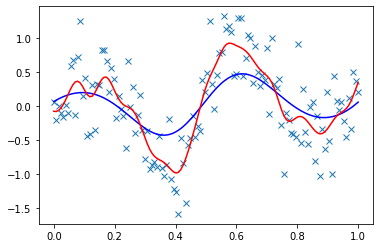

In [36]:
# Fit with a specfied bandwidth.
LP1est=kernel.KernelReg(y,x,'c',reg_type='ll',bw=[-0.1])

# Fit with cross-validated bandwidth.
LP1estCV=kernel.KernelReg(y,x,'c',reg_type='ll',bw='cv_ls')

# Output cross-validated bandwidth
print(LP1estCV.bw)

# Plot results
yfit=LP1est.fit(x)[0]
yfitCV=LP1estCV.fit(x)[0]
plt.plot(x,y,'x')
plt.plot(x,yfit,'b')
plt.plot(x,yfitCV,'r')

In [37]:
# Import pywt to do a wavelet analysis
import pywt

1.2491622537888303


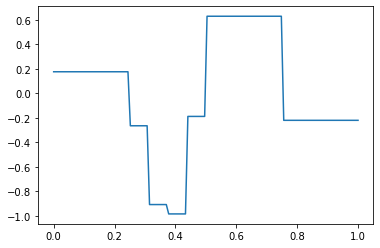

In [38]:
exdwt=pywt.wavedec(y,'db1')
sighat=1.4826*np.median(np.abs(exdwt[len(exdwt)-1]-np.median(exdwt[len(exdwt)-1])))
univthresh=sighat*np.sqrt(2.0*np.log(len(y)))
print(univthresh)
for i in range(len(exdwt)):
    exdwt[i]=pywt.threshold(exdwt[i], univthresh, 'hard')
plt.plot(x,pywt.waverec(exdwt,'db1'))